# Twitter Sentiment Analysis for Fashion Nova
## Tweets gathered from Jan 1, 2021 to Mar 31, 2022

In [134]:
import pandas as pd
from dateutil import parser
from bs4 import BeautifulSoup

## Explore sentiment analysis over time
### Import, clean and analyze data
#### Analysis done using VADER (https://ojs.aaai.org/index.php/ICWSM/article/view/14550/14399)

In [135]:
df1 = pd.read_csv('fashionnova_jan1_2021_to_sept31_2021.csv') #1/1/21-8/31/21
df2 = pd.read_csv('fashionnova_sept1_2021_to_mar25_2022.csv') #9/1/21-3/25/22
df3 = pd.read_csv('fashionnova_mar26_2022_to_mar31_2022.csv') #3/26/22-3/31/22

In [136]:
df = df1.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.sort_values('created_at')
df

,tweet_id,created_at,text,author_id
18869,1344795684529176577,2021-01-01 00:00:50+00:00,@caroline1hill @eBay @FashionNova Happy New Ye...,595107054
18868,1344797481272541184,2021-01-01 00:07:59+00:00,@caroline1hill @eBay @FashionNova You are fant...,43233118
18867,1344801951989567488,2021-01-01 00:25:45+00:00,@caroline1hill @eBay @FashionNova Quiet one fo...,2435673836
18866,1344810626892251136,2021-01-01 01:00:13+00:00,If I’m gonna enter 2021 I minus well do it rea...,23622012
18865,1344812692624781312,2021-01-01 01:08:25+00:00,@Allie__W @caroline1hill @eBay @FashionNova If...,1038662662496890881
...,...,...,...,...
37173,1509654893736660994,2022-03-31 22:12:29+00:00,@celeste_brightt @FashionNova Wow absolutely g...,3066288553
37172,1509658000956481536,2022-03-31 22:24:50+00:00,@celeste_brightt @FashionNova Little bit of pa...,957283646880219136
37171,1509658706488737793,2022-03-31 22:27:38+00:00,@celeste_brightt @FashionNova You set off whit...,1332730515904995328
37170,1509658950609907717,2022-03-31 22:28:36+00:00,@celeste_brightt @FashionNova I love seeing yo...,1479191527691796481


In [137]:
df
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df.tail()

,tweet_id,created_at,text,author_id
37173,1509654893736660994,2022-03-31,@celeste_brightt @FashionNova Wow absolutely g...,3066288553
37172,1509658000956481536,2022-03-31,@celeste_brightt @FashionNova Little bit of pa...,957283646880219136
37171,1509658706488737793,2022-03-31,@celeste_brightt @FashionNova You set off whit...,1332730515904995328
37170,1509658950609907717,2022-03-31,@celeste_brightt @FashionNova I love seeing yo...,1479191527691796481
37169,1509665439076569099,2022-03-31,@JovaeNicole @FashionNova ThickNBeautiful Queen,772319131


In [138]:
df.loc[1,:]['text']

'My dresses 👗 are here from @fashionnova , can’t wait til try them on 😩🙏🏾'

In [139]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eurydice\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\eurydice\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [140]:
sentence = df['text'][8]
print(sentence)
sid.polarity_scores(sentence)['compound']

@OjaniMoncrieffe @FashionNova U mad stupid u talking all that shit YET back then there was different words u a pornstar so u getting wild 😂😂😂


-0.8807

In [141]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9_]+","",tweet) #Remove @'s
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    
    #remove most emoticons and symbols
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    tweet = re.sub(regex_pattern,"",tweet)
    
    #convert html to text. removes html encoding, e.g. &amp, &quot, etc...
    del_amp = BeautifulSoup(tweet, 'lxml')
    tweet = del_amp.get_text()

    # remove contractions
    tweet = re.sub(r"won’t", "will not",tweet)
    tweet = re.sub(r"would’t", "would not",tweet)
    tweet = re.sub(r"could’t", "could not",tweet)
    tweet = re.sub(r"\’d", " would",tweet)
    tweet = re.sub(r"can\’t", "can not",tweet)
    tweet = re.sub(r"n\’t", " not", tweet)
    tweet = re.sub(r"\’re", " are", tweet)
    tweet = re.sub(r"\’s", " is",tweet)
    tweet = re.sub(r"\’ll", " will", tweet)
    tweet = re.sub(r"\’t", " not", tweet)
    tweet = re.sub(r"\’ve", " have", tweet)
    tweet = re.sub(r"\’m", " am", tweet)
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet


In [142]:
df['tweet_clean'] = df['text'].apply(cleaner)

In [143]:
df

,tweet_id,created_at,text,author_id,tweet_clean
18869,1344795684529176577,2021-01-01,@caroline1hill @eBay @FashionNova Happy New Ye...,595107054,Happy New Year home ..
18868,1344797481272541184,2021-01-01,@caroline1hill @eBay @FashionNova You are fant...,43233118,You are fantastic
18867,1344801951989567488,2021-01-01,@caroline1hill @eBay @FashionNova Quiet one fo...,2435673836,Quiet one for me .
18866,1344810626892251136,2021-01-01,If I’m gonna enter 2021 I minus well do it rea...,23622012,If I am enter 2021 I minus well do it real Sua...
18865,1344812692624781312,2021-01-01,@Allie__W @caroline1hill @eBay @FashionNova If...,1038662662496890881,If did not get a gift card she will be home .
...,...,...,...,...,...
37173,1509654893736660994,2022-03-31,@celeste_brightt @FashionNova Wow absolutely g...,3066288553,Wow absolutely gorgeous 🤍🤍🤍🤍🤩🤩🤩🤩
37172,1509658000956481536,2022-03-31,@celeste_brightt @FashionNova Little bit of pa...,957283646880219136,Little bit of paradise ? a LOT of paradise the...
37171,1509658706488737793,2022-03-31,@celeste_brightt @FashionNova You set off whit...,1332730515904995328,You set off white like crazy . Wow !!
37170,1509658950609907717,2022-03-31,@celeste_brightt @FashionNova I love seeing yo...,1479191527691796481,I love seeing your Gorgeous


In [144]:
word_dict = {'manipulate':-1,'manipulative':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'liar':-1}

sid.lexicon.update(word_dict)
list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [145]:
df['sentiment'] = pd.Series(list1)
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [146]:
df = df[['tweet_clean','created_at','tweet_id','sentiment','sentiment_category', 'text']]
df.head()

,tweet_clean,created_at,tweet_id,sentiment,sentiment_category,text
18869,Happy New Year home ..,2021-01-01,1344795684529176577,0.4588,positive,@caroline1hill @eBay @FashionNova Happy New Ye...
18868,You are fantastic,2021-01-01,1344797481272541184,0.0000,neutral,@caroline1hill @eBay @FashionNova You are fant...
18867,Quiet one for me .,2021-01-01,1344801951989567488,0.0000,neutral,@caroline1hill @eBay @FashionNova Quiet one fo...
18866,If I am enter 2021 I minus well do it real Sua...,2021-01-01,1344810626892251136,0.2023,positive,If I’m gonna enter 2021 I minus well do it rea...
18865,If did not get a gift card she will be home .,2021-01-01,1344812692624781312,0.6588,positive,@Allie__W @caroline1hill @eBay @FashionNova If...


### Plot time series of the sentiment analysis: Jan 1, 2021 to Mar 31, 2022

In [147]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['created_at'],as_index=False).count()

pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['created_at'],as_index=False).count()

pos = pos[['created_at','tweet_id']]
neg = neg[['created_at','tweet_id']]

In [148]:
import plotly.graph_objs as go
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_at'], y=pos['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_at'], y=neg['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [149]:
# filter the df to only capture Tweets from the start of mid sept to end of oct
newdf = df[(df['created_at']>='2021-10-01') & (df['created_at']<='2021-10-10')]
neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['created_at'],as_index=False).count()
pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['created_at'],as_index=False).count()

pos = pos[['created_at','tweet_id']]
neg = neg[['created_at','tweet_id']]

In [150]:
import plotly.graph_objs as go
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_at'], y=pos['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_at'], y=neg['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [192]:
oct4_df = df[(df['created_at'] > '2021-10-03') & (df['created_at'] < '2021-10-05')]
oct4_df_pos = oct4_df[oct4_df['sentiment_category']=='positive']
oct4_df_neg = oct4_df[oct4_df['sentiment_category']=='negative']

In [152]:
# filter the df to only capture Tweets from the start to end of the second peak in march 2022
newdf = df[(df['created_at']>='2022-03-25') & (df['created_at']<='2022-03-31')]
neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['created_at'],as_index=False).count()
pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['created_at'],as_index=False).count()

pos = pos[['created_at','tweet_id']]
neg = neg[['created_at','tweet_id']]

import plotly.graph_objs as go
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_at'], y=pos['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_at'], y=neg['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [191]:
mar28_df = df[(df['created_at']>='2022-03-27') & (df['created_at']<='2022-03-29')]
mar28_df_pos = mar28_df[mar28_df['sentiment_category']=='positive']
mar28_df_neg = mar28_df[mar28_df['sentiment_category']=='negative']

In [175]:
# filter the df to only capture Tweets from the start to end of the second peak in march 2022
newdf = df[(df['created_at']>='2021-02-06') & (df['created_at']<='2021-02-10')]
neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['created_at'],as_index=False).count()
pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['created_at'],as_index=False).count()

pos = pos[['created_at','tweet_id']]
neg = neg[['created_at','tweet_id']]

import plotly.graph_objs as go
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_at'], y=pos['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_at'], y=neg['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [202]:
feb8_df = df[(df['created_at']>='2021-02-07') & (df['created_at']<='2021-02-09')]
feb8_df_pos = feb8_df[feb8_df['sentiment_category']=='positive']
feb8_df_neg = feb8_df[feb8_df['sentiment_category']=='negative']

## Explore sentiment peaks
Sentiment peaks found: Feb 8, 2021; Oct 4, 2021; Mar 28, 2022

In [203]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["FashionNova", "FashionNovaHelp", "Fashion nova", "Fashion Nova", "Fashion", "Nova"])

### Explore Feb 8, 2021 peak

#### Positive

In [204]:
text = feb8_df_pos['tweet_clean'].str.cat(sep=' ')
text

'Nice !!! You and ur damn fashion nova my lady Which is your attitude , when you want your way ? 1 , 2 or 3 @ , I see why Name of this particular address ???? When I go to the site I want to get straight on it . Thank you ! an oversized tee is always a great idea You are trying to seem like you \' re educated { comma } but your grammar is atrocious you sound like someone with a third grade education you don \' t put at the end of your only someone with a lack of education does that you are so ghetto That team you have like you just up a bunch of your home and and told them let \' s do a show , none of them are educated and they are just making you look like a total incompetent real talk I will All night and a new wig . Like ( pronounced ‘ mischief ’) is an creative collective known for its viral . This time , the collective you to become an anti - influencer by like , and . 🤳 DAMN these ! I am broke man leave me alone let me place this last order though Take my card 🥴 I went crazy toda

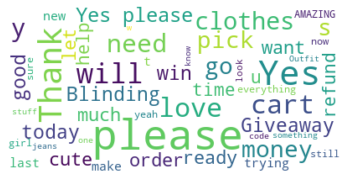

In [205]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Negative

In [206]:
text = feb8_df_neg['tweet_clean'].str.cat(sep=' ')
text

'is becoming more and more of a disappointment . I just want to say that looking at your show you look like a damn fool . You \' re ignorant , your crew is ignorant , you are on national television in the midst of you need to stop it you look like a damn fool where my package hoe these are all beautiful and accentuate her body so well !! Man chill 50 % off ???🥺 Thank you I think I \' m in love 🥰 for sure City Baby !!! Knock knock Never to late for the party . Gorgeous Save Your , Blinding , Star Boy 5 o \' clock  it needs to be PERFECT ITS THE better under than over right ? this needs a jean upgrade something fierce & Huh ? $ 7 mill on what ? Somebody walking around $ 6 , 999 , 999 in their pocket 🤷\u200d♀️ Please please please make my come true As a fan this game ai not it I saw laura wearing it & now i need it 🥺 birthday in a few 🥰 Me \u200d♀️\u200d♀️ Love ❤️ clothing and . This would be so amazing to have . I have had such a busy week 🥺🥺🥺. I have so many already in my list so that 🥰

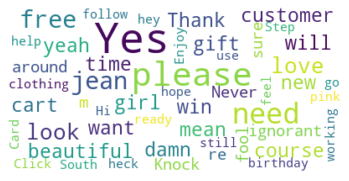

In [207]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Explore Oct 4, 2021 peak

#### Positive

In [208]:
text = oct4_df_pos['tweet_clean'].str.cat(sep=' ')
text

'Am I ? Wow you look great my dear . Is it a V shape hair style ? You have prefect length for it . How do you deal with boredom in this quarantine ? i need a piece of advice Hello , chat ? people are getting breast .. cut it with the childish boob sizes 🤞 Damn girl so sexy So sexy please help ?!? My order should of come today ?!? How are you beautiful Ordered my baby shower dress from this express shipping better work y ’ all customer support line trash my order got the wrong state on it and it is no where to reach anybody or anything so crazy when you spend so much money you would think actual people would be helping you not a with automatic help How can i get in touch ?? I been reaching out & nobody . literally gotten one response Make a rip - off version 🤣 definitely gone @ until they message me back Did you try writing When I had a problem with mine it took them a day to write me back & fix mine catch them before they send it out . i ordered two days ago i hope they write me back i

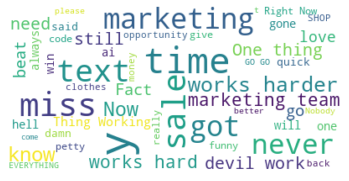

In [209]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Negative

In [210]:
text = oct4_df_neg['tweet_clean'].str.cat(sep=' ')
text

"answer my ! I y ’ all so many times . I need to change the date of my shipping or just cancel my order . Y ’ all pocket not only is my delivery late . You sent me some else order . the worse customer service process in the world how could somebody that people to promote them not have a department for it is ridiculous . Now I understand why getting more business find you on the preorder list plus size Rate my scandalous | Fashion nova haul 2021 | life of h | When is ur baby shower ? where is my baby ? this NOT like Nice needs to run a sale for being down are final sale though so I am going to message them Please keep that like 20 % off . We got bigger you have 24hrs to respond 🤣 When your to be cute and buy you a cute dress from and they will not even answer their support . Not being shady today “ down only thing working is their ” If does nothing else , they will find a reason to promote 🤣 Honestly , is the holy grail of marketing . I see y ’ all 🤣🤣. with the clutch message 🤣🤣 Meanwhi

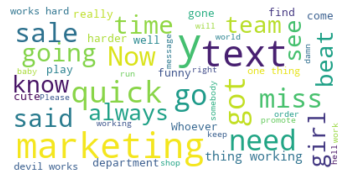

In [211]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Explore March 28, 2022 peak

#### Positive

In [212]:
text = mar28_df_pos['tweet_clean'].str.cat(sep=' ')
text

'I do not have to cut because my fit do it for me Search : “ Cutting Legging Set ” ad ✨ and it \' t help that won \' t even refund me they keep sending me a gift card so this stupid process can keep itself ! Express shipping do not mean to them Thank you Bill !! It \' s not far you beautiful ladies and yet so far away for all \u200d Next day shipping from is a joke . It is been two days and still have not received anything . Ready again for a white night … ❤️ wearing for tonight emerald “ Ready for a Party Rhinestone Dress Set ” by with green satin / iridium rhinestone “ - 06R ” Bordello by stillsexyat45 ❤️ Yes an agent out and said give them 24 to 48 , to research . It 48 and I do not have any . needs to cancel , they will cause you to lose great . are you be this soon ? i wear it to an event next month Have my 🤤 incredibly gorgeous do you offer pickup Can pick from you ? And local thrift Hi how long does it take for to deliver to . In of days and . Thanks those pants ! !!! And the ma

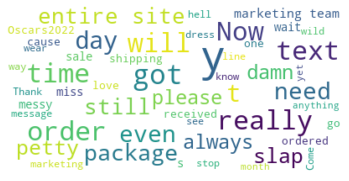

In [213]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Negative

In [214]:
text = mar28_df_neg['tweet_clean'].str.cat(sep=' ')
text

'so are you Gorgeous ❤️❤️❤️❤️❤️ from What we doing this ? ☺️ FOLLOW Looking mighty sexy my queen 🥰🥰🥰🥰 coming soon : Twas real fun animating the Butterfly 🦋, took long I love it Muse : ( I hope you love it ) Music : by Still the " Island Days 3 Piece bikini set " of by AJ2DWRLD Fireboy Thanks so much babe 🤎✨ Love it Cute Sis . How bout my Brunch Fit ? Ignore my hair , I tried my best with what I can do with it where is my clothes ?!??? Um add a chin to go with it Good girl if y ’ all push my order back one more damn time !!!! It is not no damn holiday . sponsor me 🥰 Beautiful bout to hit us with a “ we WILL SLAP the sale on our entire spring collection !” 🤣 Easy Breezy about to come through with a coupon code like “ Smack ”🤣🤣🤣 Humor Cool looking dress ❤️ Wonder what code or gone use about this slap I an order with last and they saying it \' s not going to be til the 31st . It \' s never taken this long to get an order from them . One gorgeous sexy looking hourglass right there ⏳ still w

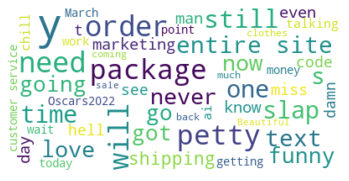

In [215]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Explore peaks using TF-IDF vectorizer

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)